In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading The Data 😀

In [88]:
data_books = pd.read_csv(r'I:\Python\dataSet\ml\book recommendation\Books.csv')
data_rating =  pd.read_csv(r'I:\Python\dataSet\ml\book recommendation\Ratings.csv')

C:\Users\Mohamed Hamde\AppData\Local\Temp\ipykernel_5208\1829159878.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_books = pd.read_csv(r'I:\Python\dataSet\ml\book recommendation\Books.csv')


# Merge The Data

In [89]:
main_data = data_books.merge(data_rating, on='ISBN', how='inner')

In [90]:
data = main_data.copy()
data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


# Preprocessing Data  

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031134 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


* ***show some of describtive statistics***

In [92]:
data.describe()

,User-ID,Book-Rating
count,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00
std,8.052466e+04,3.854157e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


* ***The Data has Null Values?***

In [93]:
data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

* ***Oops there are null values 😱***
* here you can keep it bcs we just intersted by (Rating) to calculate (weighted rating) so as you like if you will remove it or keep it  

In [94]:
data.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5


In [95]:
data.shape

(1031136, 10)

# Calculate the Weighted Rating
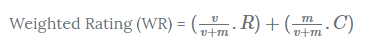
* number of voting for every movie = v
* mean of voting for every movie = R
* mean of voting for all movie = C
* at least this movie has (90%) voting = m

In [96]:
data_v = data.groupby('ISBN')['Book-Rating'].count().reset_index()
data['vote_count'] = data_v['Book-Rating']

data_R = data.groupby('ISBN')['Book-Rating'].mean().reset_index()
data['vote_average'] = data_R['Book-Rating']

data_C = data['Book-Rating'].mean()

data_m = data['vote_count'].quantile(0.9)

In [97]:
data.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,vote_count,vote_average
268105,0312306326,Visions of Sugar Plums,Janet Evanovich,2002,St. Martin's Press,http://images.amazon.com/images/P/0312306326.0...,http://images.amazon.com/images/P/0312306326.0...,http://images.amazon.com/images/P/0312306326.0...,265205,0,1.0,6.0
138139,044661193X,Basket Case,Carl Hiaasen,2003,Warner Books,http://images.amazon.com/images/P/044661193X.0...,http://images.amazon.com/images/P/044661193X.0...,http://images.amazon.com/images/P/044661193X.0...,77809,0,2.0,4.0
866978,3746618967,Blue Girl.,Zoe G. Garnett,2002,Aufbau Tb,http://images.amazon.com/images/P/3746618967.0...,http://images.amazon.com/images/P/3746618967.0...,http://images.amazon.com/images/P/3746618967.0...,111946,3,NaN,NaN
705435,3453160924,Lucy Sullivan wird heiraten.,Marian Keyes,2000,Heyne,http://images.amazon.com/images/P/3453160924.0...,http://images.amazon.com/images/P/3453160924.0...,http://images.amazon.com/images/P/3453160924.0...,41227,0,NaN,NaN
652435,0140277447,The Rape of Nanking: The Forgotten Holocaust o...,Iris Chang,1998,Penguin Books,http://images.amazon.com/images/P/0140277447.0...,http://images.amazon.com/images/P/0140277447.0...,http://images.amazon.com/images/P/0140277447.0...,93179,0,NaN,NaN


* ***filter out the movies that qualify for the chart(90%)***

In [99]:
# data for recommendation system
data_rs = data.loc[data['vote_count'] >= data_m]

In [100]:
data_rs.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,vote_count,vote_average
91948,0515111279,The Cat Who Wasn't There,Lilian Jackson Braun,1994,Jove Books,http://images.amazon.com/images/P/0515111279.0...,http://images.amazon.com/images/P/0515111279.0...,http://images.amazon.com/images/P/0515111279.0...,47609,0,114.0,1.245614
126688,1558743669,"A Child Called \It\"": One Child's Courage to S...",Dave Pelzer,1995,Health Communications,http://images.amazon.com/images/P/1558743669.0...,http://images.amazon.com/images/P/1558743669.0...,http://images.amazon.com/images/P/1558743669.0...,53590,0,11.0,3.363636
31362,0451410556,The Blue Last: A Richard Jury Mystery (Richard...,Martha Grimes,2002,Onyx Books,http://images.amazon.com/images/P/0451410556.0...,http://images.amazon.com/images/P/0451410556.0...,http://images.amazon.com/images/P/0451410556.0...,11601,0,7.0,2.142857
138285,0060955406,The Peculiar Memories of Thomas Penman,Bruce Robinson,2000,Perennial,http://images.amazon.com/images/P/0060955406.0...,http://images.amazon.com/images/P/0060955406.0...,http://images.amazon.com/images/P/0060955406.0...,55187,0,10.0,1.200000
118087,0451153553,Misery,Stephen King,1988,New Amer Library,http://images.amazon.com/images/P/0451153553.0...,http://images.amazon.com/images/P/0451153553.0...,http://images.amazon.com/images/P/0451153553.0...,7346,0,8.0,0.875000


* ***Weighted Rating***

In [101]:
def weighted_rating(data_rs, m=data_m, C=data_C):
    v = data_rs['vote_count'] 
    R = data_rs['vote_average']
    # Calculation based on the IMDB formulareturn (v/(v+m) *R) + (m/(m+v) *C)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [102]:
data_rs['weighted_rating'] = data_rs.apply(weighted_rating, axis=1)

C:\Users\Mohamed Hamde\AppData\Local\Temp\ipykernel_5208\1441225896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rs['weighted_rating'] = data_rs.apply(weighted_rating, axis=1)


# Get Top 10 Books 

In [108]:
#Sort movies based on score calculated above
data_rs = data_rs.sort_values('weighted_rating', ascending=False)

#Print the top 10 movies
data_rs[['Book-Title', 'Book-Author', 'Publisher', 'weighted_rating']].head(10)

,Book-Title,Book-Author,Publisher,weighted_rating
236927,Voyager,DIANA GABALDON,Dell,7.374973
13456,Four Blind Mice,James Patterson,"Little, Brown",6.715187
224538,The Devil's Teardrop,Jeffery Deaver,Pocket,6.554585
38774,Along Came a Spider (Alex Cross Novels),James Patterson,Warner Books,6.493668
83625,The Brethren,John Grisham,Island,6.462561
83867,The Brethren,John Grisham,Island,6.412305
189249,Honourable Schoolboy,John Le Carre,Pan Books Ltd,6.411390
129833,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,HarperTorch,6.403335
265812,Writer's Digest Flip Dictionary,Barbara Ann Kipfer,F &amp; W Pubns,6.395779
69374,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,Penguin Books,6.391557


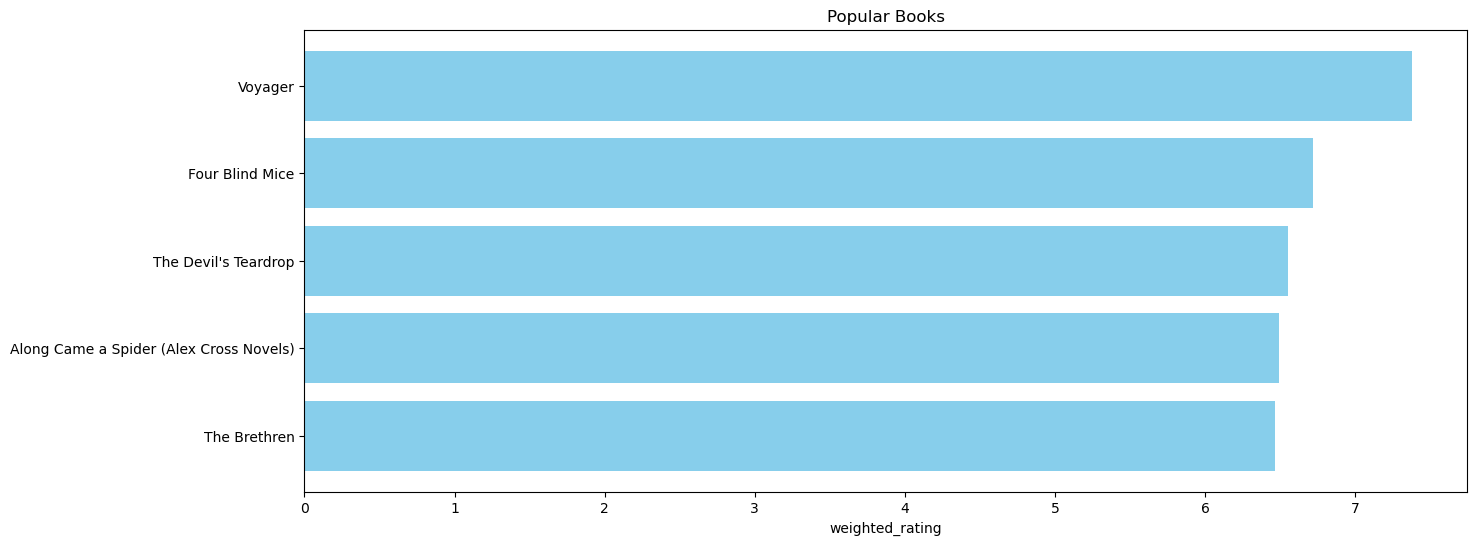

In [117]:
plt.figure(figsize=(15,6))
plt.barh(data_rs['Book-Title'].head(6),data_rs['weighted_rating'].head(6), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("weighted_rating")
plt.title("Popular Books")
plt.show()

In [121]:
data_rs.to_csv(r'C:\Users\Mohamed Hamde\OneDrive - Culture and Science City\Desktop\Clean Code AI\streamLite\recommendation_system\data_books.csv')